<div>
  <span style="font-size:32px; font-weight: bold;">ICE Videogames</span><br><br>
</div>

ICE Videogames es una portal especializado en la venta de videojuegos en linea establecido en 2010. El diferenciador de ICE Videogames es la información proporcionada de los videojuegos que comercializa, no solo incluyendo la descripción proporcionada por cada plataforma sino incluyendo las calificaciones brindadas por la crítica especializada y las calificaciones de otros usuarios; haciendolo un portal único en su ramo e industria.
Con el crecimiento del comercio electrónico y la llegada de otros competidores, ICE Videogameas tiene planeado para el 2017 hacer una inversión considerable en campañas publicitaras para expander su negocio y ventas a nivel global. Para lograr eso se nos encomendó realizar un análisis que desarrollaremos en este informe.

<div>
    <span style="font-size:20px;">
    Exploración del  comportamiento de los usuarios
  </span>
</div> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import levene

In [2]:
games = pd.read_csv('/datasets/games.csv')

# Preparación de Datos

Para poder planear correctamente la campaña de 2017, ICE Videogames nos proporciono un archivo con información de 2016 para hacer el análisis pertinente y encontrar datos relevantes que les permita tomar decisiones informadas. 
Antes de hacerlo, necesitamos revisar la información proporcionada para darle en tratamiento adecuado para que sea correcta, coherente y completa para evitar errores. Para eso se revisará la información de todas las columnas para buscar datos faltante, errores, omisiones y completarlos adecuadamente.

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.columns = games.columns.str.lower()

In [6]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [9]:
games['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [10]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
games_2 = games.copy()

In [12]:
games.replace('tbd', np.nan, inplace=True)

In [13]:
games.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [14]:
games['user_score'] = games['user_score'].astype(float)

In [15]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [17]:
100 * games.isna().sum() / games.shape[0]

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

In [18]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [19]:
games.dropna(subset = ['name', 'genre'], inplace = True)

In [20]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [21]:
games.dropna(subset = ['year_of_release'], inplace = True)

In [22]:
100 * games.isna().sum() / games.shape[0]

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.453418
user_score         54.615665
rating             40.598395
dtype: float64

In [23]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [24]:
games.reset_index(drop=True, inplace=True)

In [25]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [26]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


Después de realizar el análisis exploratorio de los datos nos percatamos que teniamos datos ausentes en 6 de las 11 columnas que conforman nuestro DataFrame original(name, year_of_release, genre, critic_score, user_score y rating).

Los registros de los datos faltanes de las columnas de name, year_of_release y genre se decidieron eliminar ya que los porcentajes no son significativos y el impacto de esa información faltante no es relevante.

En el caso de los datos faltantes de las otras 3 columnas (critic_score, user_score y rating), se decidieron conservar con valores ausentes por dos razones:
- Al tener una gran número de información faltante sí se eliminan se perderá información importante.
- Para este análisis, esa información no es necesaria que se complete. En este caso no se imputó información para estos datos para no interferir en la información proporcionada.

Ahora, seguiremos con el análisis de los datos.

# Análisis de datos

Los datos proporcionados por ICE Videogames incluye información de ventas de todos los juegos vendidos desde 1980, en un primer paso paso, revisaremos toda la información proporcionada para ver como ha sido el compartamiento de las ventas a lo largo de los años para ver si logramos encontrar una tendencia y así poder ayudar a la empresa a planear sus campañas para 2017.

In [27]:
def games_per_year(games):
    summary={}
    for start in range (1980, 2020, 10):
        end = start + 9
        games_per_year =  games[(games['year_of_release'] >= start) & (games['year_of_release'] <= end)].shape[0]
        summary[f'{start}s'] = games_per_year
    return pd.DataFrame(list(summary.items()), columns=['decade', 'games_per_year'])

games_per_decade = games_per_year(games)

In [28]:
games_per_decade = games_per_decade.set_index(games_per_decade.columns[0])
games_per_decade

,games_per_year
decade,
1980s,205
1990s,1769
2000s,9193
2010s,5277


<AxesSubplot:title={'center':'Videogames Released Per Decacade'}, xlabel='decade'>

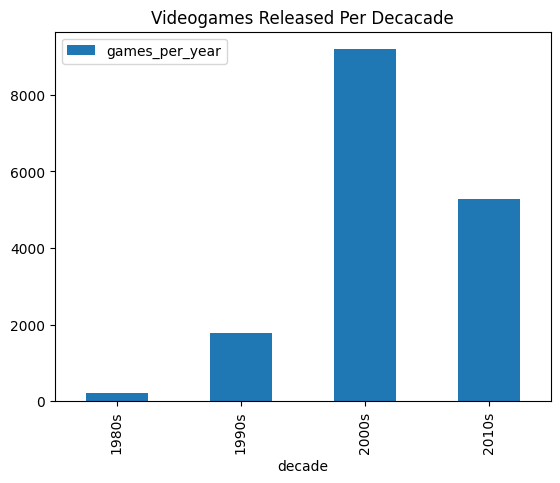

In [29]:
games_per_decade.plot(kind='bar', title='Videogames Released Per Decacade')

<AxesSubplot:title={'center':'Videogames Released Per Year'}, xlabel='year_of_release'>

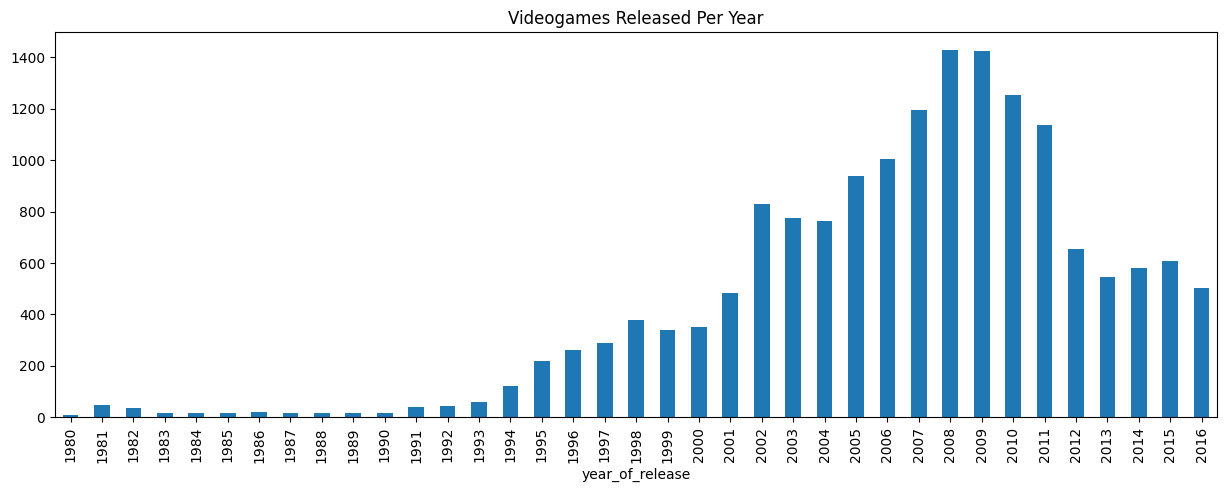

In [30]:
games.groupby('year_of_release')['name'].count().plot(kind = 'bar',figsize=(15,5), title='Videogames Released Per Year')

Después de visualizar las ventas de videojuegos por decadas y años, podemos ver que en en la decada de los 80s y 90s las ventas empezaron a subir muy lentamente ya que en estos años cantidad de videojuegos y plataformas era limitado. Podemos ver que en la decada de 2000 tenemos un pico de ventas siendo los años 2008 y 2009 los que tuvieron mayor cantidad de ventas. Tambien notamos que en la decada de 2010 las ventas de videojuegos van a la baja.

In [31]:
games_sorted = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

<AxesSubplot:title={'center':'Total Sales Per Platform'}, xlabel='platform'>

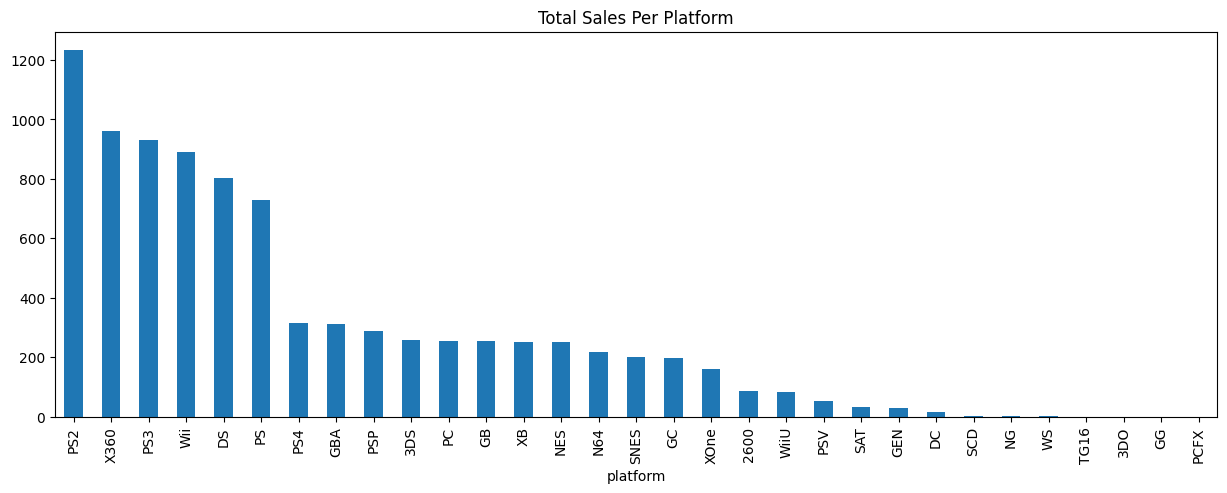

In [32]:
games_sorted.plot(kind = 'bar',figsize=(15,5), title='Total Sales Per Platform')

In [33]:
games_list = games_sorted.head(10).index.to_list()
games_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

<AxesSubplot:title={'center':'Top 10 Popular Platforms'}, xlabel='platform'>

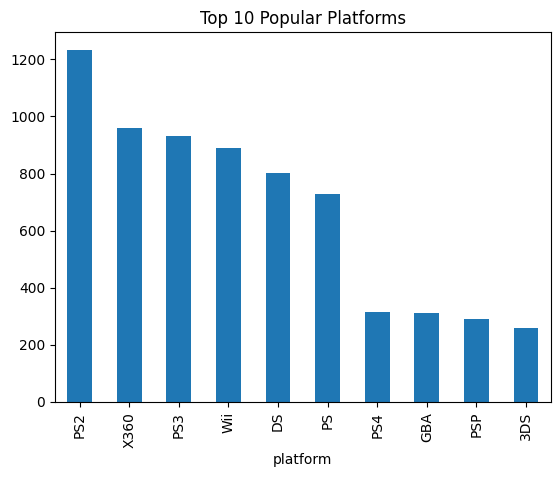

In [34]:
games_analysis = games[(games['platform'].isin(games_list))]
games_analysis = games_analysis.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
games_analysis.plot(kind = 'bar', title = 'Top 10 Popular Platforms')

De las listas que plataformas que más juegos han vendido tenemos un mix bastante interesante, el 50% pertenecen a Play Station, el 40% a Nintendo y solo el 10% es de X-Box. A pesar de eso, X-Box 360 es la segunda más popular; Play Station 2 y 3 tienen el primer y tercer lugar respectivamente.

Esta información es de todo el historial de ventas proporcionado, pero si los tomamos tal cual la información que nos resultará será poco precisa por los años que comprende el listado. Es posible que pataformas populares ya no tengan juegos disponibles a la venta, es por eso que para analisar la información y poder hacer la planeación de las campañas de 2017 se tomara información del 2012 a la fecha para tener un histórico de 5 años y poder ver las tendencias de ventas de la última decada. 

In [35]:
games_filter = games[games['year_of_release'] >= 2012]

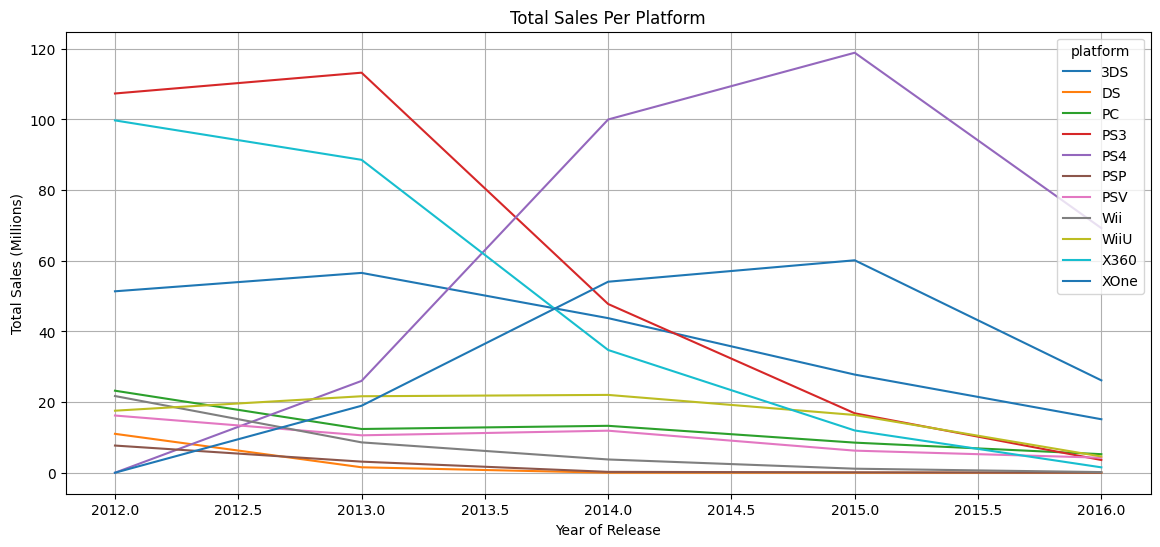

In [36]:
games_analysis_per_year = games_filter.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)
games_analysis_per_year.plot(kind = 'line', figsize=(14,6), title='Total Sales Per Platform')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='platform'>

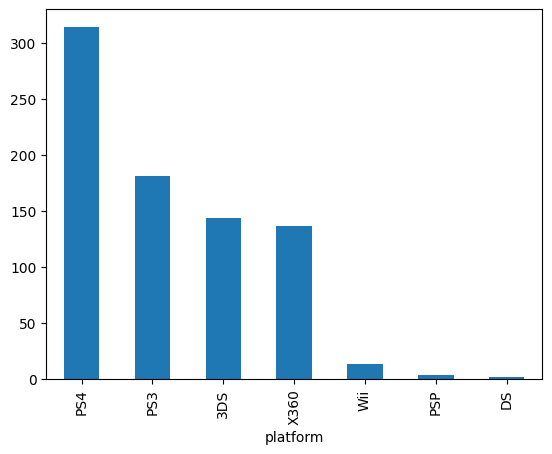

In [37]:
games_analysis_year = games[(games['platform'].isin(games_list))& (games['year_of_release'] > 2012)]
games_analysis_year = games_analysis_year.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
games_analysis_year.plot(kind = 'bar')

In [38]:
games_analysis_year.head(10)

platform
PS4     314.14
PS3     181.43
3DS     143.25
X360    136.80
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

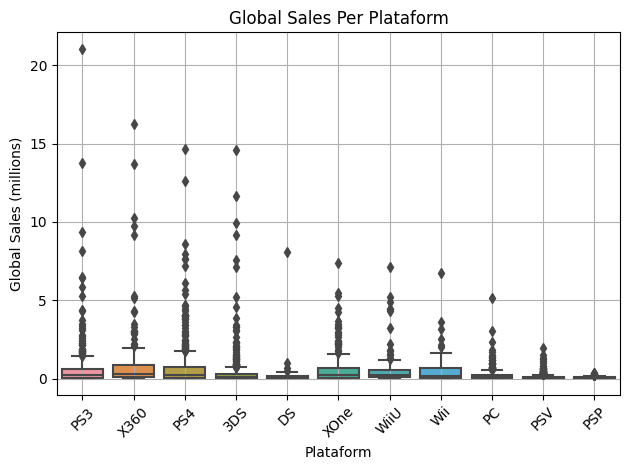

In [39]:
sns.boxplot(data=games_filter, x='platform', y='total_sales')

plt.title('Global Sales Per Plataform')
plt.xlabel('Plataform')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Al analizar la información por plataforma, vemos que el promedio de las ventas en muy similar en el top 3, pero si podemos ver qye tenemos muchos valores atípicpos en todos los juegos. 

Con esta información podemos inferir que las plataformas PS3, X360 y PS4 tuvieron mas ventas de lo normal, es por eso que vemos los datos atipicos tan desfazados de las medias.

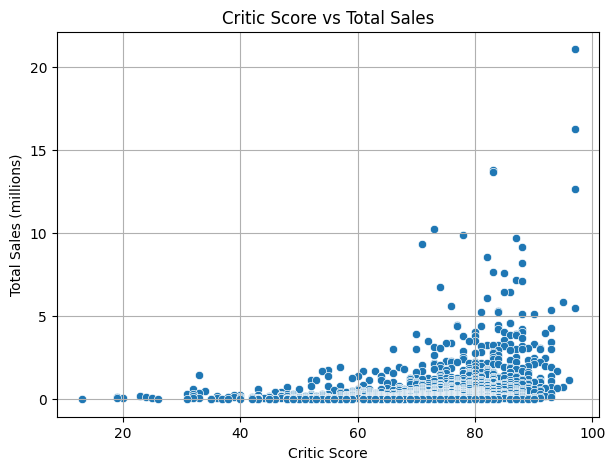

In [40]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=games_filter, x='critic_score', y='total_sales')
plt.title('Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.grid(True)
plt.show()

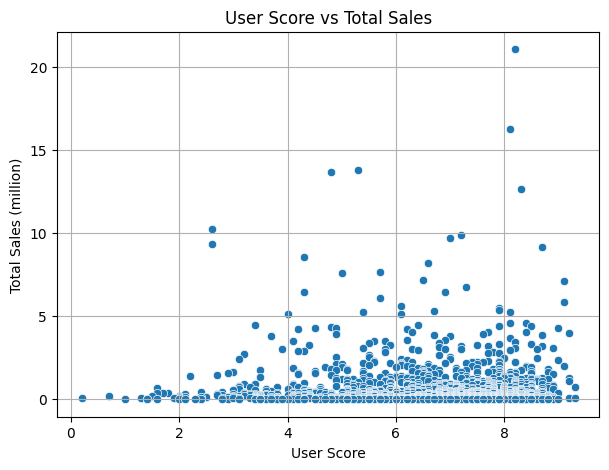

In [41]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=games_filter, x='user_score', y='total_sales')
plt.title('User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (million)')
plt.grid(True)
plt.show()

In [42]:
correlation = games_filter[['critic_score', 'user_score', 'total_sales']]
correlation_matrix = correlation.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              critic_score  user_score  total_sales
critic_score      1.000000    0.517727     0.308197
user_score        0.517727    1.000000     0.004429
total_sales       0.308197    0.004429     1.000000


Con las correlaciones podemos ver que las calificaciones de la critica especializada y de los usuarios es positiva fuerte, pero esto no se refleja tanto con las ventas totales. La que se nota que tiene una relación mas alejada del 0 es la del critica especializada. Con esto podemos inferir que los jugadores la hace caso a este rubro más que a los comenatrios/calificaciones de otros jugadores.

In [43]:
multi_platform_games = games_filter.groupby('name')['platform'].nunique()
multi_platform_games = multi_platform_games[multi_platform_games > 1].index
games_filter_multi = games_filter[games_filter['name'].isin(multi_platform_games)]

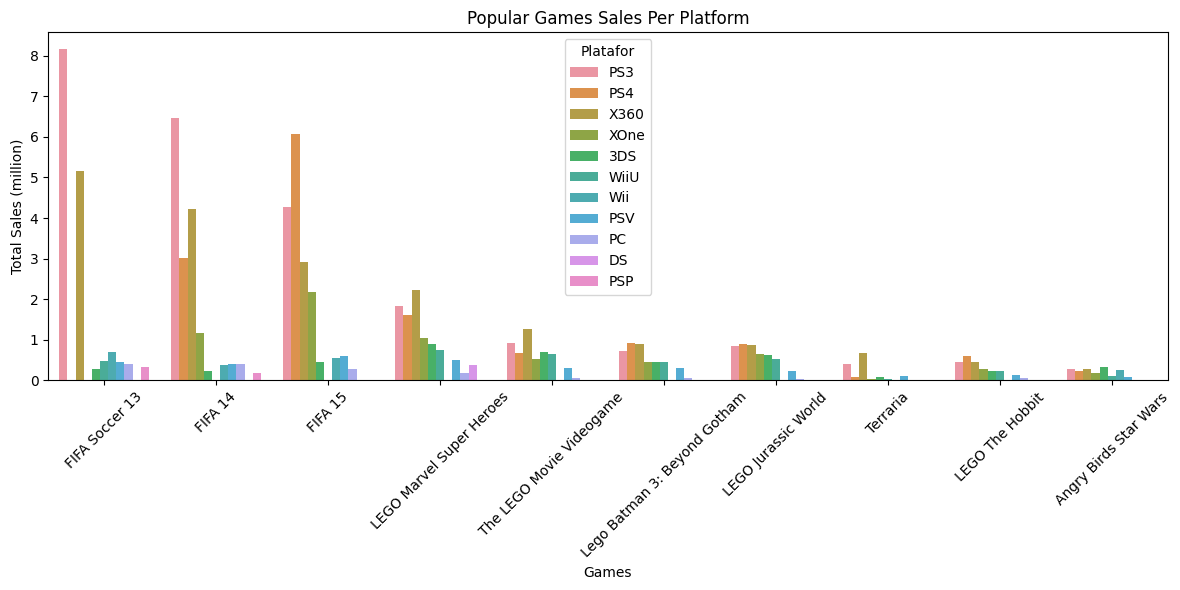

In [44]:
test = games_filter_multi['name'].value_counts().head(10).index
games_filter_test = games_filter_multi[games_filter_multi['name'].isin(test)]

plt.figure(figsize=(12, 6))
sns.barplot(data=games_filter_test, x='name', y='total_sales', hue='platform')

plt.title('Popular Games Sales Per Platform')
plt.xlabel('Games')
plt.ylabel('Total Sales (million)')
plt.legend(title='Platafor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Videogames Per Genre'}, xlabel='genre'>

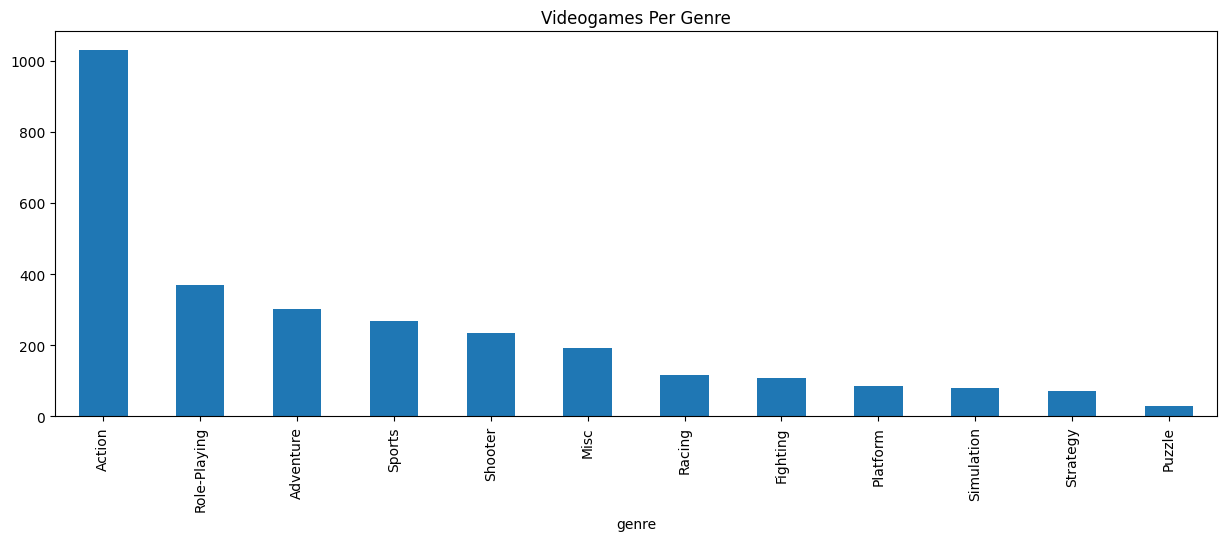

In [45]:
games_filter.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind = 'bar',figsize=(15,5), title='Videogames Per Genre')

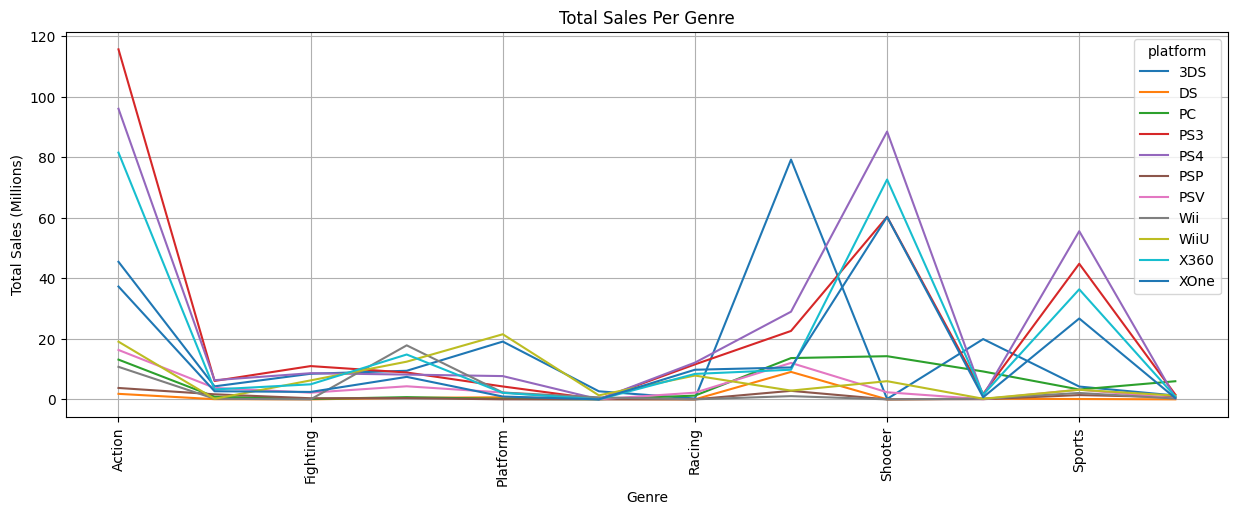

In [46]:
games_analysis_per_genre = games_filter.groupby(['genre', 'platform'])['total_sales'].sum().unstack(fill_value=0)
games_analysis_per_genre.plot(kind = 'line', figsize=(15,5), title='Total Sales Per Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [47]:
games_analysis_per_genre.head(30)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,,
Action,45.49,1.82,13.14,115.75,96.10,3.76,16.33,10.75,19.07,81.60,37.31
Adventure,4.30,0.06,0.87,6.09,6.34,1.67,3.79,0.19,0.17,3.27,2.68
Fighting,8.46,0.00,0.12,11.00,8.65,0.36,2.21,0.00,6.27,4.97,2.45
Misc,9.45,0.48,0.73,8.88,8.19,0.41,4.32,17.86,12.46,14.83,7.43
Platform,19.11,0.69,0.14,4.26,7.69,0.00,2.26,2.25,21.53,2.14,0.93
Puzzle,2.66,0.10,0.03,0.04,0.02,0.00,0.06,0.66,1.32,0.00,0.00
Racing,0.28,0.00,1.23,11.56,12.14,0.00,2.21,0.01,7.87,8.41,9.79
Role-Playing,79.30,9.08,13.65,22.62,28.99,2.81,12.05,1.06,2.89,9.80,10.55
Shooter,0.13,0.00,14.27,60.39,88.56,0.00,2.34,0.00,6.01,72.70,60.33


Despues de analizar la información de los juegos mas vendidos, plataformas más populares y generos, podemos observar que los generos que se pueden considerar más rentables son:
- Acción
- Juego de Roles
- Aventura
- Deportes

El genero de Deportes (FIFA) es el que más precencia tienen para ventas para multimples plataformas de Play Station. El genero de Aventuras, tienen una distribución de ventas en todas las plataformas por igual.

# Perfil de usuario

Para poder establecer si se debe hacer alguna campaña especializada o enfocada para las regiones en donde se venden los videojuegos, analizaremos el comprotamiento de ventas por platforma y genero.

In [56]:
platform_sales = games_filter.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
total_sales_by_region = platform_sales.sum()

In [58]:
market_share = platform_sales.divide(total_sales_by_region)
market_share

,na_sales,eu_sales,jp_sales
platform,,,
3DS,0.093592,0.084132,0.455862
DS,0.007767,0.006965,0.019317
PC,0.032354,0.074504,0.000000
PS3,0.174933,0.210844,0.183249
PS4,0.184003,0.278383,0.082875
PSP,0.000220,0.000829,0.054367
PSV,0.018580,0.022414,0.109253
Wii,0.029528,0.023519,0.017603
WiiU,0.064470,0.049584,0.067556


## Norteamérica

In [59]:
top5_na = platform_sales['na_sales'].sort_values(ascending=False).head(5)
print("Top 5 plataformas en Norteamérica:")
print(top5_na)

Top 5 plataformas en Norteamérica:
platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64


In [62]:
genre_sales = games_filter.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
top5_genres_na = genre_sales['na_sales'].sort_values(ascending=False).head(5)

print("Top 5 géneros en Norteamérica:")
print(top5_genres_na)

Top 5 géneros en Norteamérica:
genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64


## Europa

In [60]:
top5_eu = platform_sales['eu_sales'].sort_values(ascending=False).head(5)
print("\nTop 5 plataformas en Europa:")
print(top5_eu)


Top 5 plataformas en Europa:
platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64


In [63]:
top5_genres_eu = genre_sales['eu_sales'].sort_values(ascending=False).head(5)
print("\nTop 5 géneros en Europa:")
print(top5_genres_eu)


Top 5 géneros en Europa:
genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64


## Japón

In [61]:
top5_jp = platform_sales['jp_sales'].sort_values(ascending=False).head(5)
print("\nTop 5 plataformas en Japón:")
print(top5_jp)


Top 5 plataformas en Japón:
platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64


In [64]:
top5_genres_jp = genre_sales['jp_sales'].sort_values(ascending=False).head(5)
print("\nTop 5 géneros en Japón:")
print(top5_genres_jp)


Top 5 géneros en Japón:
genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64


In [65]:
rating_sales = games_filter.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
rating_mean = games_filter.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].mean()

print("Ventas totales por clasificación ESRB:")
print(rating_sales)

print("\nVentas promedio por clasificación ESRB:")
print(rating_mean)


Ventas totales por clasificación ESRB:
        na_sales  eu_sales  jp_sales
rating                              
E         114.37    113.03     28.33
E10+       75.70     55.37      8.19
M         231.57    193.96     21.20
T          66.02     52.96     26.02

Ventas promedio por clasificación ESRB:
        na_sales  eu_sales  jp_sales
rating                              
E       0.289544  0.286152  0.071722
E10+    0.247386  0.180948  0.026765
M       0.465000  0.389478  0.042570
T       0.160243  0.128544  0.063155


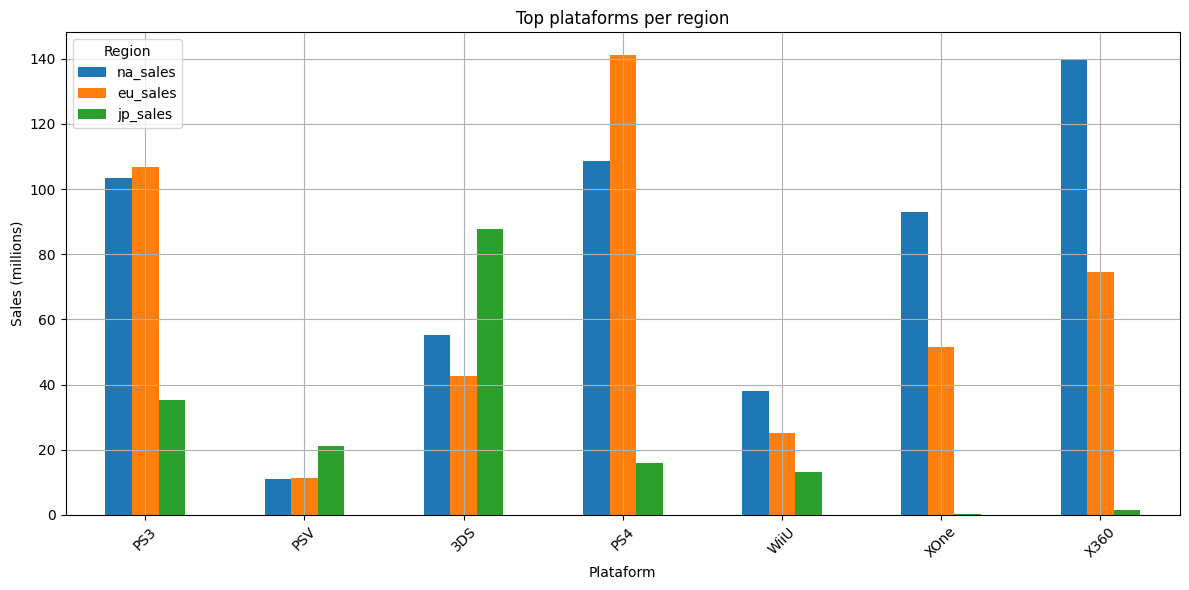

In [66]:
top5na = games_filter.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top5eu = games_filter.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top5jp = games_filter.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

top_platforms = list(set(top5na.index) | set(top5eu.index) | set(top5jp.index))

platformsales = games_filter.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
platformsales = platformsales.loc[top_platforms]

platformsales.plot(kind='bar', figsize=(12, 6))
plt.title('Top Plataforms Per Region')
plt.ylabel('Sales (millions)')
plt.xlabel('Plataform')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

# Test de hipótesis

Para este análisis se hará un análisis estadístico para evaluar las siguienets hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

## Primer Test : Por Plataforma

- H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
- HA: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son distintas.

Vamos a contrastar con un nivel de significancia $\alpha$ de 0.05

Vamos a contrastar dos **categorias** (XOne y PC) conrespecto a una variable numérica (*user_score*), además desconoces las desv estandar reales, el test más adecuado será el t-test

In [48]:
games_filter.platform.unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

In [49]:
score_xone = games_filter[games_filter['platform'] =='XOne']['user_score'].dropna()
score_pc = games_filter[games_filter['platform'] == 'PC']['user_score'] .dropna()

- H0: Las varianzas de las calificaciones de los usuarios para las plataformas Xbox One y PC son iguales.
- HA: Las varianzas de las calificaciones de los usuarios para las plataformas Xbox One y PC son distintas.

Vamos a contrastar con un nivel de significancia $\alpha$ de 0.05

In [50]:
alpha = 0.05

_, pvalue_levene = levene(score_xone, score_pc)

if pvalue_levene < alpha :
    print('Rechazamos la hipótesis nula, las varianzas son distintas')
    equalVar = False
else:
    print('No rechazamos la hipótesis nula, las varianzas son iguales')
    equalVar =  True

Rechazamos la hipótesis nula, las varianzas son distintas


In [51]:
alpha = 0.05

_, pvalue = ttest_ind(score_xone, score_pc, equal_var = equalVar)

print(f""" 
    La clasificación promedio de usuarios para la Xone es : {score_xone.mean()}
    La clasificación promedio de usuarios para la PC es : {score_pc.mean()}

    p-value: {pvalue}
""")

if pvalue < alpha :
    print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipótesis nula')

 
    La clasificación promedio de usuarios para la Xone es : 6.521428571428572
    La clasificación promedio de usuarios para la PC es : 6.4286407766990274

    p-value: 0.5489537965134912

No rechazamos la hipótesis nula


## Segundo Test : Por Genero

- H0: Las calificaciones promedio de los usuarios para los generos Acción y Deportes son disferentes.
- HA: Las calificaciones promedio de los usuarios para los generos Acción y Deportes no son diferentes.
Vamos a contrastar con un nivel de significancia $\alpha$ de 0.05

Vamos a contrastar dos categorias (Acción y Deportes) conrespecto a una variable numérica (user_score), además desconoces las desv estandar reales, el test más adecuado será el t-test

In [52]:
games_filter.genre.unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

In [53]:
score_action = games_filter[games_filter['genre'] =='Action']['user_score'].dropna()
score_sports = games_filter[games_filter['genre'] == 'Sports']['user_score'] .dropna()

- H0: Las calificaciones promedio de los usuarios para los generos Acción y Deportes son disferentes.
- HA: Las calificaciones promedio de los usuarios para los generos Acción y Deportes no son diferentes.

Vamos a contrastar con un nivel de significancia $\alpha$ de 0.05

In [54]:
alpha = 0.05

_, pvalue_levene = levene(score_action, score_sports)

if pvalue_levene < alpha :
    print('Rechazamos la hipótesis nula, las varianzas son distintas')
    equalVar = False
else:
    print('No rechazamos la hipótesis nula, las varianzas son iguales')
    equalVar =  True

Rechazamos la hipótesis nula, las varianzas son distintas


In [55]:
alpha = 0.05

_, pvalue = ttest_ind(score_action, score_sports, equal_var = equalVar)

print(f""" 
    La clasificación promedio de usuarios para el genero Acción es : {score_action.mean()}
    La clasificación promedio de profesionales para el genero Deportes es : {score_sports.mean()}

    p-value: {pvalue}
""")

if pvalue < alpha :
    print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipótesis nula')

 
    La clasificación promedio de usuarios para el genero Acción es : 6.825047801147227
    La clasificación promedio de profesionales para el genero Deportes es : 5.455897435897437

    p-value: 4.24307776572644e-20

Rechazamos la hipótesis nula


Despúes de analizar estadisticamente las hipototesis podemos decir que:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

## Conclusión general

Despúes de analizar la información proporcionada por ICE Videogames y generar el análisis del pérfil del cliente por región podemos decir que se pueden impulsar campañas globales y no regionales para optimizar los recuersos. 

Esto debido a que en las 3 regiones el género de 'Accion' y 'Role Playing' se encuentra en el top 5. También vemos que 3 plataformas se encuentran dentro de las que más juegos se compran dentro del sitio, Play Station con 2 de sus plataforma y Nintendo con 1. 

Gracias a esto podemos explorar la posibilidad de acercarnos con Play Station y Nintendo para colaborar en la promoción de las plataformas y juegos para esas plataformas ya que son las que lideran el top 5 de las 3 regiones.

Podemos ver que el género "Mature" es el que tiene mayor porcentaje de ventas en 2 de las 3 regiones, por lo cual se puede considerar que son los juegos más rentables para generar ingresos y sería prudente promocionarlos durante 2017.

Particularmente, se observa que el comportamiento de la región de Japón tiene un compartmiento más uniforme en los generos que mas se venden, por lo que para esta región se podria establecer una estrategía en donde se promocione el sitio de ventas en general haciendo incapie que es en donde se pueden encontar todos los géneros y plataformas en comparación con la región de Euro y Norte América que se puede hacer una campaña más específica para el nicho de mercado a satirsfacer.